**Supervised Machine Learning project:**
**I want to train a model to classify an email into either spam or ham (not spam)**

**Importing all the necessary library**

In [5]:
import string
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [7]:
#download stoploss dataset
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JIKHARZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Import Dataset**

In [12]:
df = pd.read_csv('emails.csv')

In [17]:
df.info()
#It contains 5728 entries and has two columns.
#Text contains the email text, and spam has either 1 for spam and 0 for non-spam

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [22]:
#Stemmer initialization to take words to their root form.
stemmer = PorterStemmer()
corpus = []
stopwords_set = set(stopwords.words('english'))

In [25]:
#lowering and removing punctuation and creation of corpus (preprocessed representation of the text)
for i in range(len(df)):
    text = df['text'].iloc[i].lower()
    text = text.translate(str.maketrans('','', string.punctuation)).split()
    text = [stemmer.stem(word) for word in text if word not in stopwords_set]
    text = ' '.join(text)
    corpus.append(text)

In [27]:
#4th column in the dataset
df.text.iloc[3]

'Subject: 4 color printing special  request additional information now ! click here  click here for a printable version of our order form ( pdf format )  phone : ( 626 ) 338 - 8090 fax : ( 626 ) 338 - 8102 e - mail : ramsey @ goldengraphix . com  request additional information now ! click here  click here for a printable version of our order form ( pdf format )  golden graphix & printing 5110 azusa canyon rd . irwindale , ca 91706 this e - mail message is an advertisement and / or solicitation . '

In [28]:
#It's equivalent corpus
corpus[3]

'subject 4 color print special request addit inform click click printabl version order form pdf format phone 626 338 8090 fax 626 338 8102 e mail ramsey goldengraphix com request addit inform click click printabl version order form pdf format golden graphix print 5110 azusa canyon rd irwindal ca 91706 e mail messag advertis solicit'

In [29]:
#transforming the texts into bag of words
vectorizer= CountVectorizer()
X = vectorizer.fit_transform(corpus).toarray()
y = df.spam

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
#training a random forest classifier on the training data
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [32]:
model.score(X_test, y_test)

0.981675392670157

In [39]:
#Other metrics
from sklearn.metrics import confusion_matrix, precision_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [46]:

cm = confusion_matrix(y_test, y_pred)

In [47]:
cm

array([[874,   0],
       [ 21, 251]])

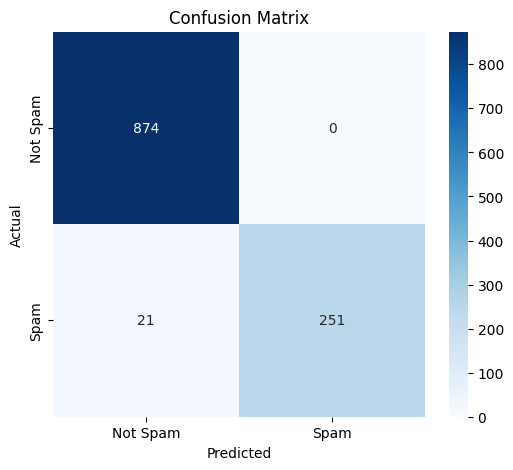

In [50]:
#Heatmap of the confusion matrix, It has quite a good performance, aside the False Negative of 21 - spam incorrectly identified as not spam
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
# Calculating the  precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 1.0


In [52]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       874
           1       1.00      0.92      0.96       272

    accuracy                           0.98      1146
   macro avg       0.99      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146

